https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

https://towardsdatascience.com/what-does-it-take-for-an-apartment-in-barcelona-to-be-a-survivor-10e0ad337672
https://opendata-ajuntament.barcelona.cat/data/en/dataset/est-mercat-immobiliari-lloguer-mitja-mensual
https://diegoquintanav.github.io/folium-barcelona-EN.html

https://opendata-ajuntament.barcelona.cat/data/en/dataset?res_format=SHP

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

pd.set_option('display.max_columns', None)

df = pd.read_pickle('./stanovi/data.pkl')
df.to_csv('./stanovi/new_data.csv')
df = pd.read_csv('./stanovi/new_data.csv')

In [2]:
print('\n\nInfo')
print(df.info())

print('\n\nNull Elements')
print(df.isnull().sum())



Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1659 non-null   int64  
 1   index                   1659 non-null   int64  
 2   propertyCode            1659 non-null   int64  
 3   thumbnail               1646 non-null   object 
 4   externalReference       1472 non-null   object 
 5   numPhotos               1659 non-null   int64  
 6   floor                   1554 non-null   object 
 7   price                   1659 non-null   float64
 8   propertyType            1659 non-null   object 
 9   operation               1659 non-null   object 
 10  size                    1659 non-null   float64
 11  exterior                1659 non-null   bool   
 12  rooms                   1659 non-null   int64  
 13  bathrooms               1659 non-null   int64  
 14  address                 1659 non-

In [3]:

df = df.drop(columns=['index', 'thumbnail', 'externalReference', 'numPhotos', 'province', 'country', 'showAddress', 'url', 'hasVideo', 'hasPlan', 'has3DTour', 'has360'])
df.propertyCode = df.propertyCode.astype(int)
#df.set_index('propertyCode', inplace = True)
df.reset_index(drop=True, inplace=True)
df.head(5)

,Unnamed: 0,propertyCode,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,address,municipality,district,neighborhood,latitude,longitude,distance,newDevelopment,priceByArea,detailedType,suggestedTexts,status,hasLift,parkingSpace,newDevelopmentFinished,Week
0,0,87688139,3,172000.0,flat,sale,67.0,False,2,2,"Calle de Provença, 127",Barcelona,Eixample,L'Antiga Esquerra de l'Eixample,41.387739,2.151873,1154,False,2567.0,{'typology': 'flat'},"{'subtitle': ""L'Antiga Esquerra de l'Eixample,...",NaN,NaN,NaN,NaN,14
1,1,89127122,2,130000.0,flat,sale,32.0,True,1,1,barrio El Raval,Barcelona,Ciutat Vella,El Raval,41.380189,2.165333,880,False,4063.0,{'typology': 'flat'},"{'subtitle': 'El Raval, Barcelona', 'title': '...",good,False,NaN,NaN,14
2,2,89115559,1,149000.0,flat,sale,45.0,False,2,1,"Calle d'Arnau d'Oms, 44",Barcelona,Nou Barris,Porta,41.430582,2.177449,4824,False,3311.0,{'typology': 'flat'},"{'subtitle': 'Porta, Barcelona', 'title': ""Pis...",good,True,NaN,NaN,14
3,3,89102591,5,220000.0,flat,sale,54.0,True,2,1,barrio La Sagrada Família,Barcelona,Eixample,La Sagrada Família,41.410451,2.178700,2711,False,4074.0,{'typology': 'flat'},"{'subtitle': 'La Sagrada Família, Barcelona', ...",good,True,NaN,NaN,14
4,4,89123676,bj,103000.0,flat,sale,67.0,False,2,1,"Calle de Travau, 29",Barcelona,Nou Barris,Can Peguera - El Turó de la Peira,41.432788,2.169198,4977,False,1537.0,{'typology': 'flat'},{'subtitle': 'Can Peguera - El Turó de la Peir...,renew,True,NaN,NaN,14


# Classify missing district and neighborhood to district based on geolocation 

In [4]:
print('\n\n There are '+ repr(df.district.isnull().sum()) +' Null Elements in district')

index_missing = df.index[df.district.isnull()]

X = df.dropna(subset=['district']).loc[:,['latitude', 'longitude']]
y= df.dropna(subset =['district']).loc[:,'district']
assert X.shape[0]==y.shape[0], 'Dimensions do not match!'
model = neighbors.KNeighborsClassifier(2, weights='distance')
## evaluate a knn model on the dataset using k-fold cross validation
# kfold = KFold(n_splits=3, random_state=7)
# result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
# print(result.mean())
model.fit(X,y)
df.loc[index_missing, 'district'] = model.predict(X=df.loc[index_missing,['latitude', 'longitude']])



 There are 30 Null Elements in district


In [5]:
print('\n\n There are '+ repr(df.neighborhood.isnull().sum()) +' Null Elements in neighborhood')

index_missing = df.index[df.neighborhood.isnull()]

X = df.dropna(subset=['neighborhood']).loc[:,['latitude', 'longitude']]
y= df.dropna(subset =['neighborhood']).loc[:,'district']
assert X.shape[0]==y.shape[0], 'Dimensions do not match!'
model = neighbors.KNeighborsClassifier(2, weights='distance')
## evaluate a knn model on the dataset using k-fold cross validation
# kfold = KFold(n_splits=3, random_state=7)
# result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
# print(result.mean())
model.fit(X,y)
df.loc[index_missing, 'neighborhood'] = model.predict(X=df.loc[index_missing,['latitude', 'longitude']])



 There are 30 Null Elements in neighborhood


# Remove Duplicates

In [6]:
# Remove duplicates
df.drop_duplicates(subset=['propertyCode','price','Week'],inplace=True)

# remove too big by surface
index_to_drop = df.index[df['size'] > 150]
df.drop(index = index_to_drop, inplace = True)
#sns.distplot(df['size'], bins = 100, kde=False, rug=True)

df.reset_index(drop=True, inplace=True)

# Geolocation

In [7]:
dfH = projected[projected.priceByArea>5000]
dfH.head()

NameError: name 'projected' is not defined

/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


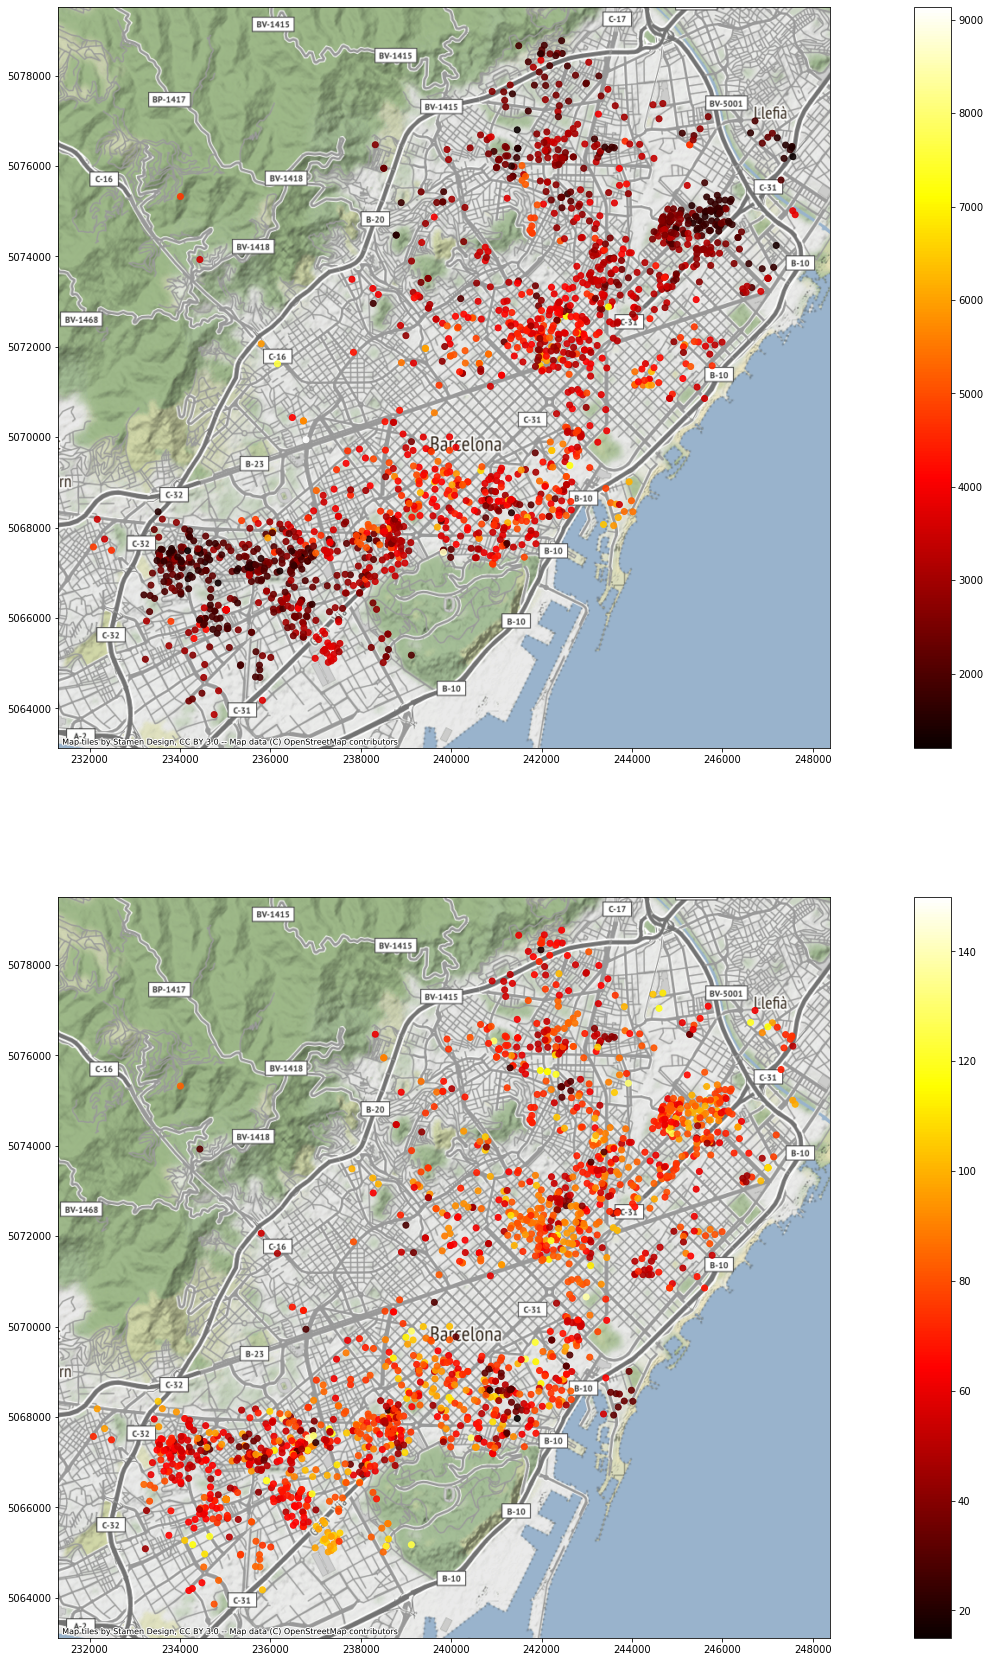

In [8]:
import geopandas as gpd
import descartes
import contextily as ctx


gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.crs = {'init' :'epsg:4326'}
gdf= gdf.to_crs(epsg=3857)


fig, ax = plt.subplots(nrows=2,figsize=(30,30))
gdf.plot(column='priceByArea', cmap='hot', legend=True, alpha=0.9, ax=ax[0])
ctx.add_basemap(ax[0])

gdf.plot(column='size', cmap='hot', legend=True, alpha=0.9, ax=ax[1])
ctx.add_basemap(ax[1])


In [9]:
for i in df['neighborhood'].value_counts():
    print(i)

105
83
71
67
59
57
55
54
52
43
41
38
37
35
32
31
29
28
27
26
26
25
25
25
25
24
24
24
24
22
22
21
20
20
18
18
17
16
15
15
15
14
14
14
12
11
11
10
10
9
8
7
7
7
6
6
6
6
5
5
5
4
4
4
3
3
3
3
3
2
2
2
2
1
1
1
1


# Number of rooms

[Text(0, 0, 'Eixample'),
 Text(0, 0, 'Ciutat Vella'),
 Text(0, 0, 'Nou Barris'),
 Text(0, 0, 'Sant Martí'),
 Text(0, 0, 'Sants-Montjuïc'),
 Text(0, 0, 'Horta Guinardó'),
 Text(0, 0, 'Sant Andreu'),
 Text(0, 0, 'Gràcia'),
 Text(0, 0, 'La Torrasa'),
 Text(0, 0, 'La Florida - Les Planes'),
 Text(0, 0, 'Santa Eulàlia'),
 Text(0, 0, 'Can Serra - Pubilla Cases'),
 Text(0, 0, 'Granvia L-H'),
 Text(0, 0, 'Bellvitge'),
 Text(0, 0, 'Sarrià-Sant Gervasi'),
 Text(0, 0, 'Collblanc'),
 Text(0, 0, 'Centre'),
 Text(0, 0, 'Les Corts'),
 Text(0, 0, 'Llefià - Sant Roc - Artigues'),
 Text(0, 0, 'Gorg  - Progrés')]

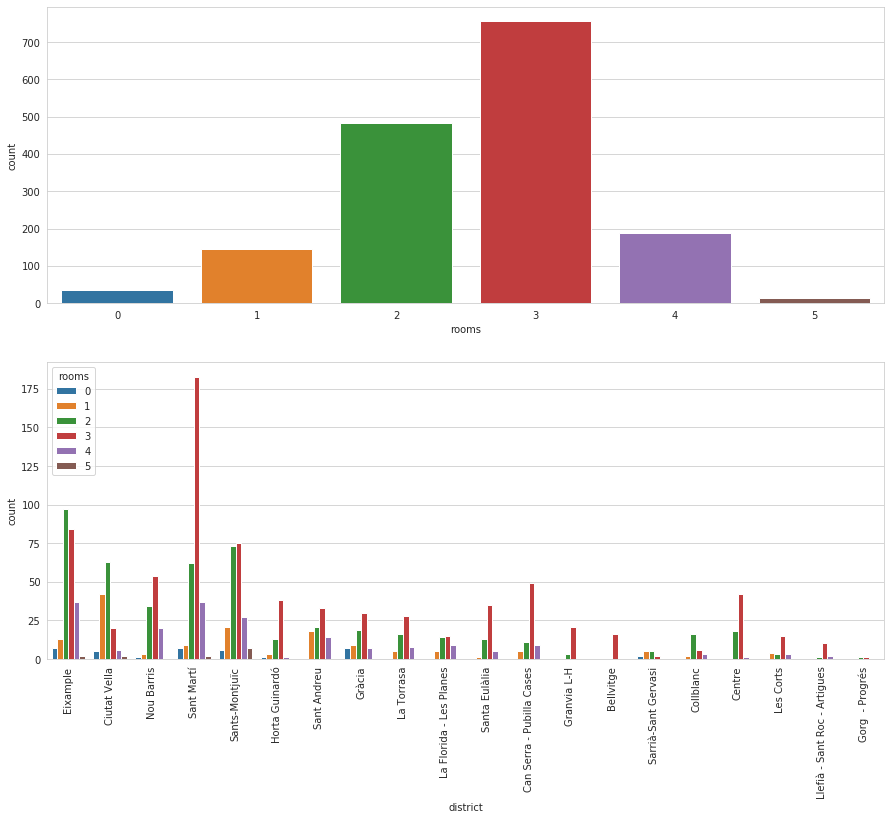

In [10]:
sns.set_style("whitegrid")
fig_size = (15,12)
fig, ax = plt.subplots(2, figsize=fig_size)

chart_roomCount = sns.countplot(x='rooms', orient = 0, data = df, ax = ax[0])
chart_roomCountDistict = sns.countplot(x = 'district', hue = 'rooms', orient = 0, data = df, ax = ax[1])
chart_roomCountDistict.set_xticklabels(chart_roomCountDistict.get_xticklabels(),rotation=90)



In [11]:
# Clean floor
df['floorSort'] = df.floor
df['floorSort'].replace('en', str(0), inplace= True) # entreplanta = 0
df['floorSort'].replace('bj', str(-1), inplace= True) # bajo = -1
df['floorSort'].replace('ss', str(-1), inplace= True) # semisotano = -1
df['floorSort'].replace(np.nan, str(-2), inplace= True) # nan = -2
#df.loc[df['floor'].isna(), 'floor']= str(-2) # nan = -2
df.floorSort = df.floorSort.apply(pd.to_numeric)

df.floor.fillna(value='Unknown', inplace=True)

#df.floor.unique()
#df.loc[df.floor=='ss']

#a = df.loc[3, 'floor']
#type(a)

ValueError: Unable to parse string "st" at position 0

In [ ]:
# col = df['exterior'].map({False:'b', True:'r'})
col = df['propertyType'].apply(lambda x: 'b' if x=='penthouse' else 'r')
size = df['propertyType'].apply(lambda x: 50 if x=='penthouse' else 15)

fig_size = (15,12)
fig, ax = plt.subplots(2, figsize=fig_size)
df.sort_values(by='floorSort').plot.scatter(y='priceByArea', x='floor', rot = 45, c=col, s=size, ax=ax[0])
df.sort_values(by=['neighborhood']).plot.scatter(y='priceByArea', x='neighborhood', rot=90, ax=ax[1])




In [ ]:
fig_size = (15,12)
fig, ax = plt.subplots(figsize=fig_size)
df.sort_values(by='floorSort').plot.scatter(y='priceByArea', x='size', rot = 4, ax=ax)





In [ ]:
assert(len(df.exterior.unique())==2), "Exterior doesn't have only True/False categories"

In [ ]:
#df = df[df['size'] < 1000]

#df.drop(index='cow', columns='small')


In [ ]:
a.head()